En este archivo realizo el EDA de cada csv creado por moneda, trayendome el DF que contiene, fechas desde enero del 2020 hasta la actualidad, precio de cierre, capitalizacion de mercado y volumen del mercado (la cantidad de una criptomoneda que se ha comprado y vendido en todos los intercambios en el dia)

## CARDANO
* Cardano se centra en la investigación científica y el desarrollo de soluciones blockchain escalables y sostenibles. Ofrece un enfoque único en la gobernanza y la investigación académica.
* Cardano fue fundada en 2017, y las token de ADA están diseñadas para asegurar que los propietarios puedan participar en el funcionamiento de la red. Debido a esto, los que poseen esta criptomoneda tienen derecho a votar sobre cualquier cambio propuesto en el software.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


In [4]:
cardano= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\cardano.csv')

In [5]:
cardano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          1327 non-null   object 
 1   PRECIO-usd      1327 non-null   float64
 2   MARKET_CAP-usd  1327 non-null   float64
 3   TOTAL_VOLUMES   1327 non-null   float64
 4   COIN_ID         1327 non-null   object 
dtypes: float64(3), object(2)
memory usage: 52.0+ KB


In [6]:
cardano.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,1327.000000,1.327000e+03,1.327000e+03
mean,0.673511,2.190792e+10,1.468778e+09
std,0.658636,2.101131e+10,2.085393e+09
min,0.023716,7.335692e+08,4.883356e+07
25%,0.146985,4.577334e+09,2.921353e+08
50%,0.392670,1.372831e+10,6.116198e+08
75%,1.129022,3.622334e+10,1.581641e+09
max,2.967075,9.500373e+10,1.743601e+10


Dentro de los valores estadisticos de precio podemos ver un minimo de 0.023 usd, maximo de 2,96usd. En comparacion con otras monedas maneja precios bajos. Sin embargo tiene capitalizacion de mercado en un ranking 8 de las top 10.  

In [7]:
cardano['FECHAS']=pd.to_datetime(cardano['FECHAS'])

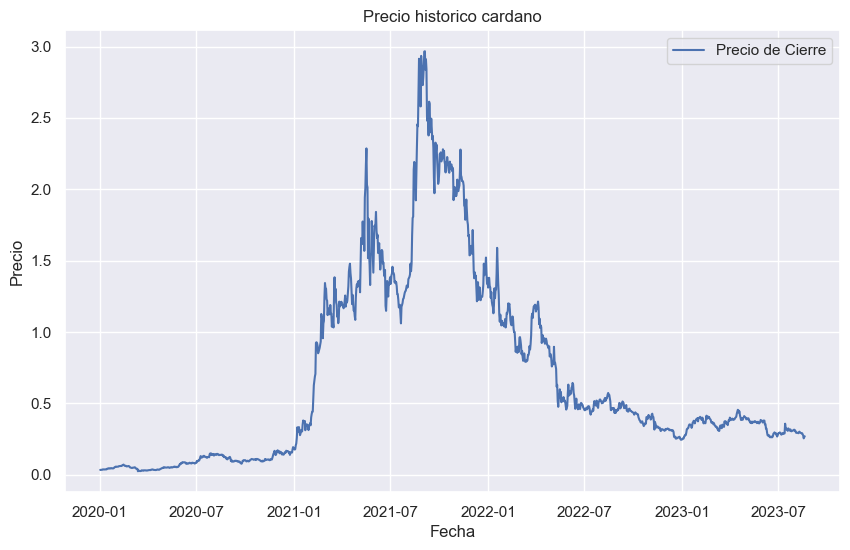

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(cardano['FECHAS'], cardano['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico cardano')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

Como vimos tambien en otras criptomonedas tambien comenzo a subir su precio en el 2021, llegando al mes de mayo/junio. Y podemos ver aca tambien su mayor precio historico en septiembre 2021 de 3.09 usd. Unos meses antes de iniciado el 2022 comienza a caer y luego se mantiene estable y mas bien descendiendo. 

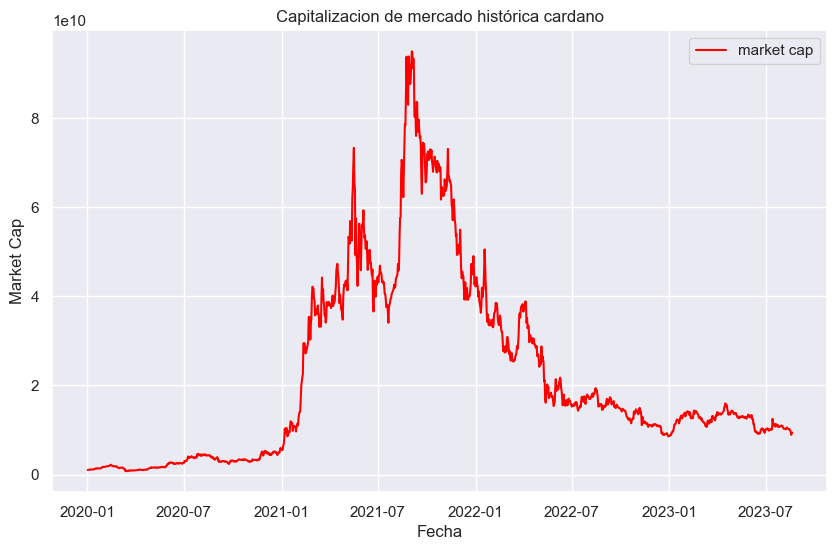

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(cardano['FECHAS'], cardano['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica cardano')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

Vemos la capitalizacion de mercado que condice con el precio. 


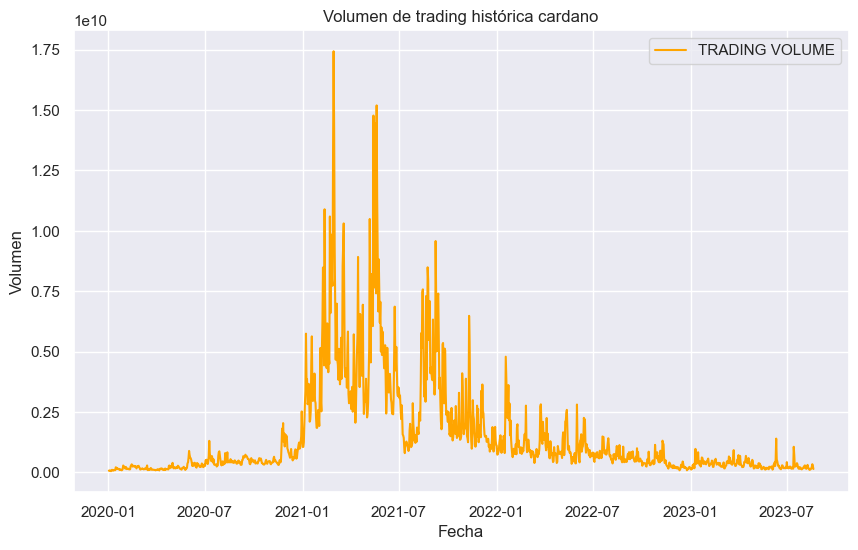

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(cardano['FECHAS'], cardano['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica cardano')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

Y en este grafico vemos el volumen de traiding, en los picos podemos ver que se correlaciona con el periodo en el que comienza a subir el precio en 2021, pero no tanto con el precio historico maximo. 

In [11]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(cardano['PRECIO-usd'], window=rsi_period)
cardano['RSI'] = indicator.rsi()

cardano.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
1322,2023-08-16,0.281729,9.874705e+09,1.741227e+08,cardano,37.264195
1323,2023-08-17,0.274852,9.638401e+09,2.347988e+08,cardano,33.584901
1324,2023-08-18,0.254361,8.918503e+09,3.406436e+08,cardano,25.504614
1325,2023-08-19,0.263688,9.235486e+09,2.651095e+08,cardano,33.363461
1326,2023-08-20,0.268186,9.404358e+09,1.410403e+08,cardano,36.824676


## RSI 
(definido en el EDA de bitcoin)

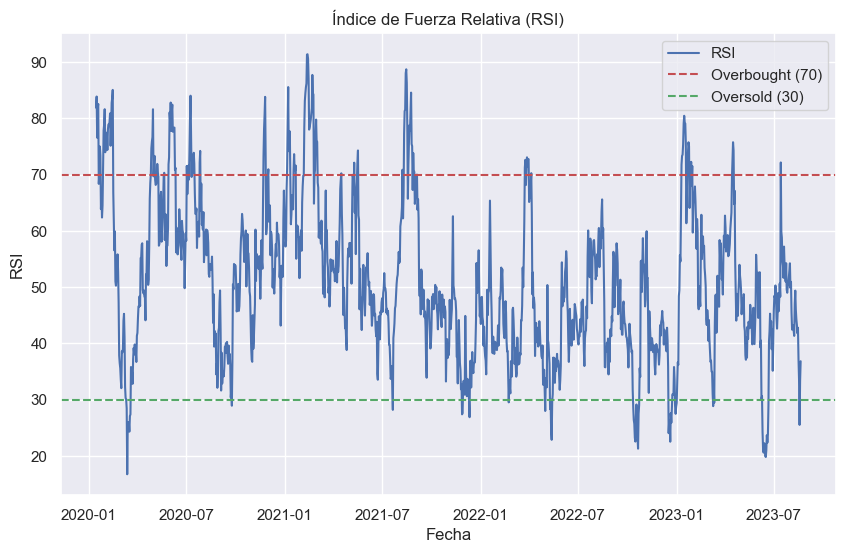

In [12]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(cardano['FECHAS'], cardano['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

En este grafico podemos ver el RSI en los distintos periodos, el rsi tiene como medida en cuenta los 14 dias previos para intentar predecir o ver si la moneda va tender a subir o bajar el precio en base a si segun los indices hubiera sobre compra(mas de 70) o sobre venta(menos de 30)

In [13]:
rolling_window = 50
cardano['MovingAverage'] = cardano['PRECIO-usd'].rolling(window=rolling_window).mean()

print(cardano.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES  COIN_ID  RSI  \
0 2020-01-02    0.033362    1.038898e+09   7.486784e+07  cardano  NaN   
1 2020-01-03    0.032618    1.015101e+09   6.383528e+07  cardano  NaN   
2 2020-01-04    0.033967    1.060794e+09   7.916796e+07  cardano  NaN   
3 2020-01-05    0.034298    1.067106e+09   7.791814e+07  cardano  NaN   
4 2020-01-06    0.034427    1.069730e+09   4.883356e+07  cardano  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


## MEDIA MOVIL

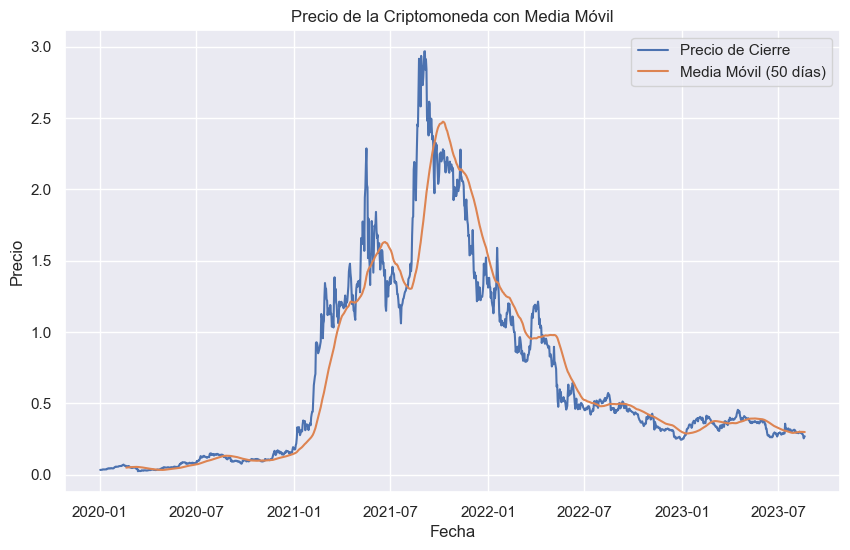

In [14]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(cardano['FECHAS'], cardano['PRECIO-usd'], label='Precio de Cierre')
plt.plot(cardano['FECHAS'], cardano['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
cardano.to_csv('cardanoDB.csv', index= False)